Name: Tushar Muley

Assignment: Craigslist_Used_Vehicle_Analysis

Date: March 5, 2022 

#### Craigslist Used Vehicle Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# setting changes
pd.set_option('display.max_columns', None)

In [3]:
# load data into dataframe by file
df_used_cars = pd.read_csv('vehicles_v10.csv')

In [4]:
print('Craigslist file size: ', df_used_cars.shape)

Craigslist file size:  (426880, 26)


#### Data Cleansing

In [5]:
# check the data
df_used_cars.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders fuel  odometer title_status  \
0          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
1          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
2          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
3          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
4          NaN   NaN       NaN       NaN  NaN       NaN          NaN   

  transmission  VIN drive size type paint_color image_url description  county  \
0          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
1          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
2          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
3          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
4          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   

  state  lat  long posting_date  
0    az  NaN   NaN          NaN  
1    ar  NaN   NaN          NaN  
2    fl  NaN   NaN          NaN  
3    ma  NaN   NaN          NaN  
4    nc  NaN   NaN          NaN

In [6]:
# check the variables and datatypes of the dataset
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
# check point copy before dropping elements
df_used_cars_copy = df_used_cars.copy(deep=True)

In [8]:
df_used_cars.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
# drop columns that are not needed
df_used_cars.drop(['url', 'region_url','VIN', 'image_url','county', 'lat', 'long'], axis = 1, inplace = True)

In [7]:
df_used_cars.shape

(426880, 19)

In [11]:
df_used_cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'state',
       'posting_date'],
      dtype='object')

In [12]:
# check of missing data values.
for a in df_used_cars.columns:
    miss=df_used_cars[a].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(a,miss))
    else:
        print('{} has NO missing values'.format(a))

id has NO missing values
region has NO missing values
price has NO missing values
year has 1205 missing values
manufacturer has 17646 missing values
model has 5277 missing values
condition has 174104 missing values
cylinders has 177678 missing values
fuel has 3013 missing values
odometer has 4400 missing values
title_status has 8242 missing values
transmission has 2556 missing values
drive has 130567 missing values
size has 306361 missing values
type has 92858 missing values
paint_color has 130203 missing values
description has 70 missing values
state has NO missing values
posting_date has 68 missing values


In [8]:
# check point 2 copy before dropping elements
df_used_cars_copy2 = df_used_cars.copy(deep=True)

In [21]:
# run if needed
# df_used_cars = df_used_cars_copy2.copy(deep=True)

In [14]:
# before drop
df_used_cars.shape

(426880, 19)

In [9]:
# drop columns that are not needed
df_used_cars.drop(['size','type', 'paint_color'], axis = 1, inplace = True)

In [10]:
# keep rows with posting dates
df_used_cars = df_used_cars[df_used_cars['posting_date'].notna()]

In [11]:
df_used_cars = df_used_cars.reset_index(drop=True)

In [12]:
# after drop
df_used_cars.shape

(426812, 16)

In [19]:
df_used_cars.head()

id  region  price    year manufacturer                     model  \
0  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
1  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
2  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
3  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
4  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

   condition    cylinders fuel  odometer title_status transmission drive  \
0       good  8 cylinders  gas   57923.0        clean        other   NaN   
1       good  8 cylinders  gas   71229.0        clean        other   NaN   
2       good  8 cylinders  gas   19160.0        clean        other   NaN   
3       good  8 cylinders  gas   41124.0        clean        other   NaN   
4  excellent  6 cylinders  gas  128000.0        clean    automatic   rwd   

                                         description state  \
0  Carvana is the safer way to buy a car During t...    al   
1  Carvana is the safer way to buy a car During t...    al   
2  Carvana is the safer way to buy a car During t...    al   
3  Carvana is the safer way to buy a car During t...    al   
4  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al   

               posting_date  
0  2021-05-04T12:31:18-0500  
1  2021-05-04T12:31:08-0500  
2  2021-05-04T12:31:25-0500  
3  2021-05-04T10:41:31-0500  
4  2021-05-03T14:02:03-0500

In [13]:
df_used_cars['posting_date'] = pd.to_datetime(df_used_cars['posting_date'], utc=True)

In [14]:
# create a date column
df_used_cars['post_date'] = df_used_cars['posting_date'].dt.date


In [13]:
df_used_cars.head()

id  region  price    year manufacturer                     model  \
0  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
1  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
2  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
3  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
4  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

   condition    cylinders fuel  odometer title_status transmission drive  \
0       good  8 cylinders  gas   57923.0        clean        other   NaN   
1       good  8 cylinders  gas   71229.0        clean        other   NaN   
2       good  8 cylinders  gas   19160.0        clean        other   NaN   
3       good  8 cylinders  gas   41124.0        clean        other   NaN   
4  excellent  6 cylinders  gas  128000.0        clean    automatic   rwd   

                                         description state  \
0  Carvana is the safer way to buy a car During t...    al   
1  Carvana is the safer way to buy a car During t...    al   
2  Carvana is the safer way to buy a car During t...    al   
3  Carvana is the safer way to buy a car During t...    al   
4  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al   

               posting_date   post_date  
0 2021-05-04 17:31:18+00:00  2021-05-04  
1 2021-05-04 17:31:08+00:00  2021-05-04  
2 2021-05-04 17:31:25+00:00  2021-05-04  
3 2021-05-04 15:41:31+00:00  2021-05-04  
4 2021-05-03 19:02:03+00:00  2021-05-03

In [15]:
# drop old posting date from df
df_used_cars.drop(['posting_date'], axis = 1, inplace = True)

In [24]:
df_used_cars.head()

id  region  price    year manufacturer                     model  \
0  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
1  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
2  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
3  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
4  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

   condition    cylinders fuel  odometer title_status transmission drive  \
0       good  8 cylinders  gas   57923.0        clean        other   NaN   
1       good  8 cylinders  gas   71229.0        clean        other   NaN   
2       good  8 cylinders  gas   19160.0        clean        other   NaN   
3       good  8 cylinders  gas   41124.0        clean        other   NaN   
4  excellent  6 cylinders  gas  128000.0        clean    automatic   rwd   

                                         description state   post_date  
0  Carvana is the safer way to buy a car During t...    al  2021-05-04  
1  Carvana is the safer way to buy a car During t...    al  2021-05-04  
2  Carvana is the safer way to buy a car During t...    al  2021-05-04  
3  Carvana is the safer way to buy a car During t...    al  2021-05-04  
4  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al  2021-05-03

In [25]:
# write data to file for future load at starting point
df_used_cars.to_csv('df_used_cars.csv', index=False)

#### Exploratory Data Analysis (EDA)

In [15]:
df_used_cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'description', 'state', 'post_date'],
      dtype='object')

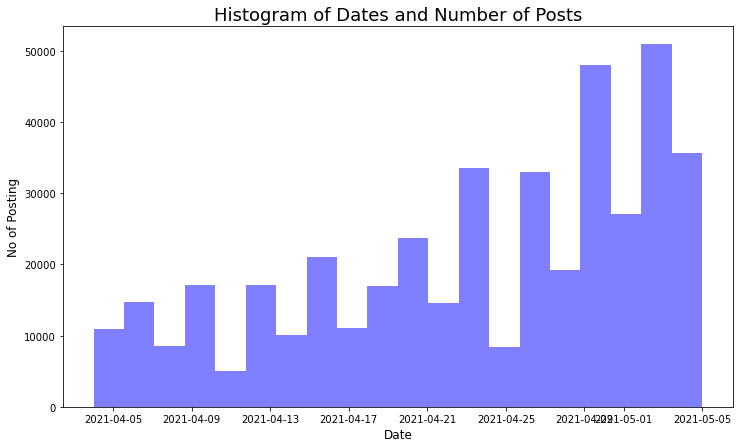

In [16]:
# histogram of frequency of trips by date
plt.figure(figsize = (12, 7))
plt.hist(df_used_cars['post_date'].dropna(), bins=20, facecolor='blue', alpha=0.5)
#Labels
plt.title('Histogram of Dates and Number of Posts', fontsize = 18)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('No of Posting', fontsize = 12)

plt.show()

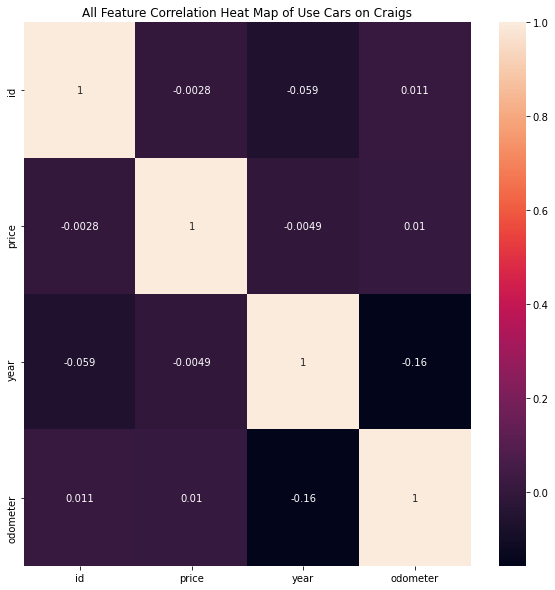

In [15]:
# correlation matrix
plt.figure(figsize = (10,10))
plt.title("All Feature Correlation Heat Map of Use Cars on Craigs")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(df_used_cars.corr(), annot=True)
plt.show()

##### 1.What model years are most frequent come up for sale?

In [16]:
# check changes
countbyyear = df_used_cars.groupby(['year']).id.count().reset_index(name='counts')
countbyyear.head()

year  counts
0  1900.0      12
1  1901.0       3
2  1902.0       1
3  1903.0      12
4  1905.0       1

In [17]:
df_used_cars.shape

(426812, 16)

In [18]:
# check point copy before dropping elements
df_used_cars_copy3 = df_used_cars.copy(deep=True)

In [19]:
# keep data with model car from 2000 forward
df_used_cars = df_used_cars[df_used_cars['year'] >= 2000] 

In [20]:
df_used_cars.shape

(400425, 16)

In [21]:
# count by model year
countbyyear = df_used_cars.groupby(['year']).id.count().reset_index(name='counts')
countbyyear.head()

year  counts
0  2000.0    3572
1  2001.0    4443
2  2002.0    5587
3  2003.0    7151
4  2004.0    8971

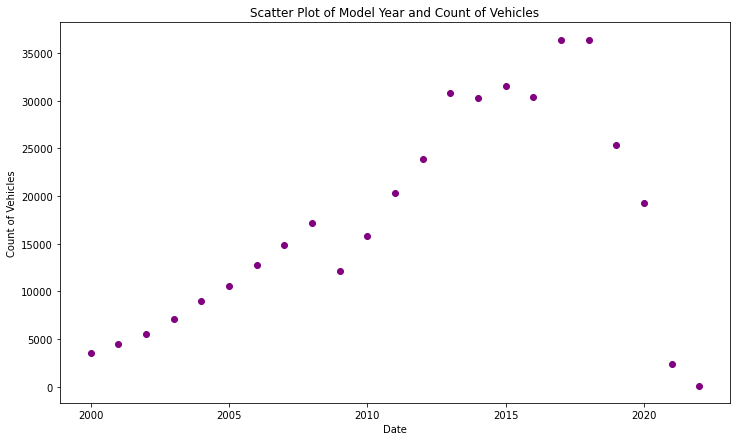

In [34]:
# scatterplot - of model year to vehicles slighted
x = countbyyear['year']
y = countbyyear['counts']

# plot
plt.scatter(x,y,color='purple')
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})

# labels
plt.title('Scatter Plot of Model Year and Count of Vehicles')
plt.xlabel('Date')
plt.ylabel('Count of Vehicles')

plt.show()

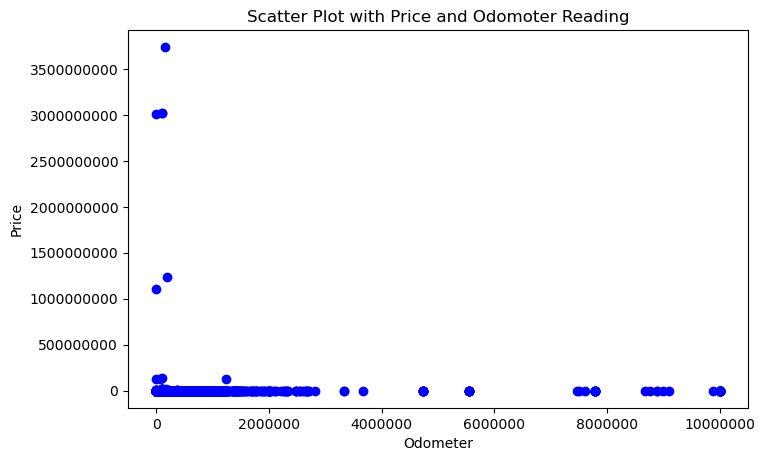

In [49]:
# Scatterplot - To check data
x = df_used_cars['odometer']
y = df_used_cars['price']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot with Price and Odomoter Reading')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [22]:
# check a few variables
df_used_cars['price'].value_counts()

0        32403
6995      3080
7995      3055
9995      2788
8995      2777
         ...  
46733        1
51           1
67003        1
9631         1
38075        1
Name: price, Length: 15422, dtype: int64

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


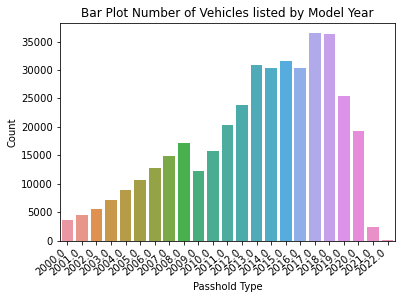

In [24]:
# plot the bar chart Vehicles listed by model year

sns.barplot('year', 'counts', data= countbyyear)
plt.title('Bar Plot Number of Vehicles listed by Model Year', fontsize= 12)
plt.xticks(rotation=40, ha = 'right')
plt.xlabel('Passhold Type', fontsize= 10)
plt.ylabel('Count', fontsize= 10)
plt.Figure(figsize=(20,12))
plt.show()



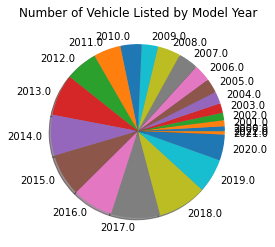

<Figure size 1440x1440 with 0 Axes>

In [30]:
y = countbyyear.counts
mylabels = countbyyear.year

plt.pie(y, labels = mylabels, shadow = True)
plt.title('Number of Vehicle Listed by Model Year', fontsize= 12)
plt.figure(figsize=(20,20))
plt.show()

In [23]:
import plotly.express as px


fig = px.pie(countbyyear, values='counts', names='year', title='Number of Vehicles Listed by Model Year')
fig.show()


##### 2.Which manufactures are seeing highest average sale prices by state?

In [24]:
# average sale price by state by model year
avgbystate = df_used_cars.groupby(['state']).price.mean().reset_index(name='mean')
avgbystate.head()


state           mean
0    ak   24474.485575
1    al   20369.905429
2    ar   18140.137189
3    az   19939.088872
4    ca  104776.856367

In [25]:
# remove DE as it appears the information is not correct
filter_top10 = avgbystate.loc[avgbystate['state'] != 'de']




In [26]:
# top 10 states
top10 = filter_top10.nlargest(n=10, columns=['mean'])

In [27]:
top10 = avgbystate.nlargest(n=10, columns=['mean']) 

In [28]:
top10

state          mean
8     de  3.463259e+06
31    nj  3.416978e+05
37    or  2.503101e+05
15    in  2.501812e+05
4     ca  1.047769e+05
42    tn  3.155751e+04
22    mi  3.085543e+04
27    nc  2.623140e+04
44    ut  2.582917e+04
49    wv  2.522489e+04

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



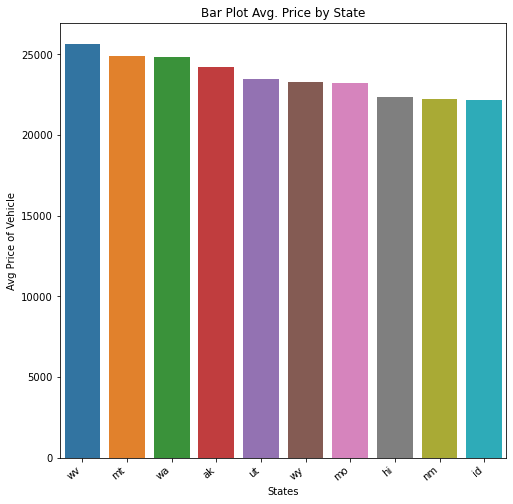

In [72]:
# bar plot of averge price by state

sns.barplot('state', 'mean', data= top10)
plt.title('Bar Plot Avg. Price by State', fontsize= 12)
plt.xticks(rotation=40, ha = 'right')
plt.xlabel('States', fontsize= 10)
plt.ylabel('Avg Price of Vehicle', fontsize= 10)
plt.Figure(figsize=(8,12))
plt.show()




In [29]:
# plot Average Vehicle price by State
px.data.gapminder()
fig = px.bar(top10, x='mean', y='state', color='state', orientation='h', title='Avg Vehicle Price by State')

fig.show()


##### 3.What is the average odometer reading?

In [30]:
# average average odometer reading by state
avgodobystate = df_used_cars.groupby(['state']).odometer.mean().reset_index(name='avg_odo')
avgodobystate.head()

state        avg_odo
0    ak   69850.779915
1    al  131926.085943
2    ar   93151.288716
3    az   83784.036829
4    ca   87583.202498

In [31]:
# bar chart of vehicles count by state
px.data.gapminder()
fig = px.bar(avgodobystate, x='state', y='avg_odo', color='state', title='Average Odometer Reading by State').update_xaxes(categoryorder='total ascending')
fig.show()

In [32]:
df = px.data.gapminder()

fig = px.scatter(avgodobystate, x='avg_odo', y='state',
                 size='avg_odo', color='state', title='Bubble Chart Odometer Reading by State',
                 hover_name='state', log_x=True, size_max=40)
fig.show()

##### 4.What is the most common condition listed?

In [33]:
# average average odometer reading by state
cntBystateYearcond = df_used_cars.groupby(['state','condition']).id.count().reset_index(name='count')
cntBystateYearcond.head()

state  condition  count
0    ak  excellent    662
1    ak       fair     30
2    ak       good    196
3    ak   like new    223
4    ak        new     26

In [34]:
# top 10 states
top10syc = cntBystateYearcond.nlargest(n=10, columns=['count'])

In [35]:
top10syc.head()

state  condition  count
24     ca  excellent  15921
26     ca       good  11738
53     fl  excellent   7725
204    ny       good   7311
55     fl       good   6307

In [36]:
# remove records below 1000 as it appears the information is too small to report. It also drops the number of conditions
# like new and new as we are looking at used cars only
filter_top10syc = cntBystateYearcond.loc[cntBystateYearcond['count'] >= 1000]

filter_top10syc

state  condition  count
8      al       good   1827
14     ar       good   1218
18     az  excellent   1813
20     az       good   2770
24     ca  excellent  15921
..    ...        ...    ...
269    va       good   2563
278    wa  excellent   1820
280    wa       good   1534
284    wi  excellent   3037
286    wi       good   3595

[64 rows x 3 columns]

In [37]:
df = px.data.gapminder()

fig = px.scatter(filter_top10syc, x='count', y='condition',
                 size='count', color='state', title='Bubble Chart of Vehicle Condition Count',
                 log_x=True, size_max=60)
fig.show()

##### 6.What states are seeing the largest used car sales?

In [38]:
# average sale price by state by model year
cntbystate = df_used_cars.groupby(['state']).id.count().reset_index(name='count')
cntbystate.head()

state  count
0    ak   3293
1    al   4642
2    ar   3856
3    az   7899
4    ca  46946

In [39]:
# top 10 count by state
top10_cnt = cntbystate.nlargest(n=10, columns=['count'])
top10_cnt

state  count
4     ca  46946
9     fl  26934
43    tx  21704
34    ny  18338
35    oh  16657
22    mi  16243
37    or  15952
27    nc  14396
47    wa  12938
38    pa  12829

In [40]:
# bar chart of vehicles count by state
px.data.gapminder()
fig = px.bar(cntbystate, x='state', y='count', color='state', title='Number Vehicles Listed by State')

fig.show()

##### 7.	Which make of cars are the most sold?

In [41]:
# number of listing by model
cntbymodel = df_used_cars.groupby(['model']).id.count().reset_index(name='count')
cntbymodel.head()

model  count
0  $362.47, $1000 down, oac, 2.9%apr $362.47,luxu...      1
1                                                  %      1
2                                           & altima      1
3                                              (300)      1
4                             (cng) 2500 express van      1

In [42]:
# filtering out counts below 500. The data shows too much individualism in modeling naming
filter_cbm = cntbymodel.loc[cntbymodel['count'] >= 500]

filter_cbm

model  count
137                         1500   4058
248       1500 crew cab big horn    635
613                          200    817
1294                        2500   2519
1600                    3 series    908
...                          ...    ...
24118  wrangler unlimited sahara    534
24128   wrangler unlimited sport    561
24272                         x3    573
24345                         x5    880
24858                      yukon    839

[118 rows x 2 columns]

In [43]:
# bar chart of vehicles count by state
px.data.gapminder()
fig = px.bar(filter_cbm, x='count', y='model', width=1000, height=1000, title='Number Vehicles Listed by Model').update_xaxes(categoryorder='total ascending')
plt.Figure(figsize=(8,12))

fig.show()

##### 6.Which manufactures are seeing highest average sale prices by state?

In [50]:
# number of listing by model
cntbymanstate = df_used_cars.groupby(['state','manufacturer']).price.mean().reset_index(name='avg_price')
cntbymanstate.head()



state manufacturer     avg_price
0    ak        acura  32932.210526
1    ak   alfa-romeo  33750.000000
2    ak         audi  29913.270270
3    ak          bmw  25535.508475
4    ak        buick  21939.531250

In [51]:
# top 10 states
top10cbms = cntbymanstate.nlargest(n=10, columns=['avg_price'])
top10cbms.head()

state   manufacturer     avg_price
325     de  mercedes-benz  2.160820e+08
601     in          volvo  3.984370e+07
1172    nj  mercedes-benz  7.545902e+06
1414    or         toyota  2.174480e+06
168     ca           jeep  7.993539e+05

In [52]:
# bottom 10
bot10cbms = cntbymanstate.nsmallest(n=10, columns=['avg_price'])
bot10cbms.head()

state     manufacturer  avg_price
275     dc          ferrari        0.0
491     id     aston-martin        0.0
760     md          ferrari        0.0
1398    or       land rover        0.0
1579    tn  harley-davidson        0.0

In [53]:
# bar chart of vehicles count by state
px.data.gapminder()
fig = px.bar(top10cbms, x='state', y='avg_price', color='manufacturer', title='Top 10 Highest Avg Price by State and Manufacturer')

fig.show()

In [54]:
# bar chart of vehicles count by state
px.data.gapminder()
fig = px.bar(bot10cbms, x='state', y='avg_price', color='manufacturer', title='Bottom 10 Lowest Avg Price by State and Manufacturer')

fig.show()

##### Model prediction of used car prices 

##### 5. Predicting the sale price of similar vehicles?

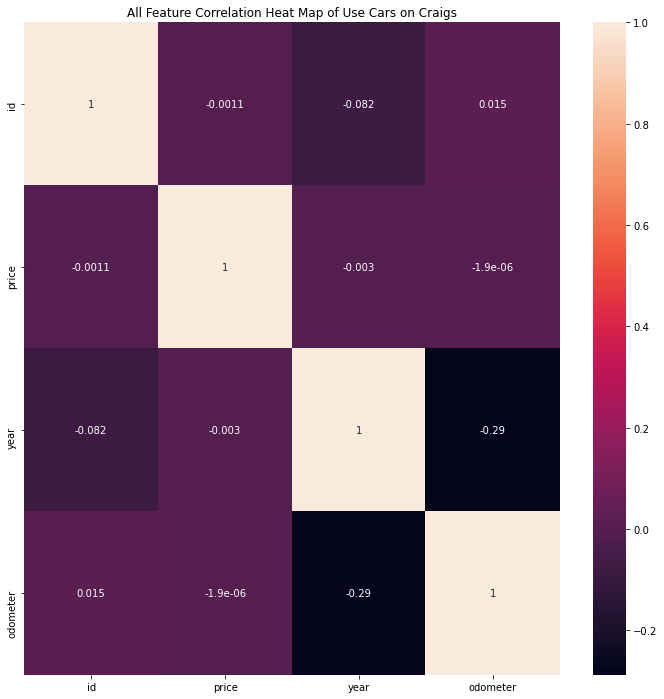

In [43]:
# correlation matrix
plt.figure(figsize = (12,12))
plt.title("All Feature Correlation Heat Map of Use Cars on Craigs")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(df_used_cars.corr(), annot=True)
plt.show()

In [44]:
df_used_cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'description', 'state', 'post_date'],
      dtype='object')

In [110]:
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400425 entries, 0 to 426811
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            400425 non-null  int64  
 1   region        400425 non-null  object 
 2   price         400425 non-null  int64  
 3   year          400425 non-null  float64
 4   manufacturer  387372 non-null  object 
 5   model         396725 non-null  object 
 6   condition     234516 non-null  object 
 7   cylinders     230351 non-null  object 
 8   fuel          397737 non-null  object 
 9   odometer      396173 non-null  float64
 10  title_status  392608 non-null  object 
 11  transmission  397981 non-null  object 
 12  drive         278511 non-null  object 
 13  description   400423 non-null  object 
 14  state         400425 non-null  object 
 15  post_date     400425 non-null  object 
dtypes: float64(2), int64(2), object(12)
memory usage: 51.9+ MB


In [45]:
# write data to file for future load at starting point
df_used_cars.to_csv('df_used_cars_before_model.csv', index=False)

In [ ]:
# load data into dataframe by file use when need to not run whole notebook
#df_used_cars = pd.read_csv('df_used_cars_before_model.csv')

##### Additional data prepare

In [53]:
# check a few variables
df_used_cars['cylinders'].value_counts()

6 cylinders     89058
4 cylinders     74097
8 cylinders     62381
5 cylinders      1611
10 cylinders     1361
other            1120
3 cylinders       557
12 cylinders      166
Name: cylinders, dtype: int64

In [54]:
# drop other cylinder count as they don't matter
df_used_cars = df_used_cars.loc[df_used_cars['cylinders'] != 'other']

In [55]:
# check a few variables
df_used_cars['cylinders'].value_counts()

6 cylinders     89058
4 cylinders     74097
8 cylinders     62381
5 cylinders      1611
10 cylinders     1361
3 cylinders       557
12 cylinders      166
Name: cylinders, dtype: int64

In [56]:
# check a few variables
df_used_cars['manufacturer'].value_counts()

ford               65651
chevrolet          49728
toyota             32622
honda              20653
nissan             18654
jeep               17668
ram                17637
gmc                15877
bmw                14353
dodge              12983
mercedes-benz      11033
hyundai            10313
subaru              9340
volkswagen          8752
kia                 8441
lexus               7995
audi                7543
cadillac            6487
acura               5906
chrysler            5839
mazda               5207
buick               5102
infiniti            4770
lincoln             3940
volvo               3180
mitsubishi          3134
mini                2351
rover               2012
jaguar              1765
pontiac             1716
porsche             1197
saturn              1038
mercury              879
alfa-romeo           869
tesla                793
fiat                 753
harley-davidson      133
ferrari               81
aston-martin          22
land rover            19


In [57]:
# before drop
df_used_cars.shape

(399305, 16)

In [58]:
df_used_cars = df_used_cars.loc[df_used_cars['manufacturer'] != 'harley-davidson']

In [59]:
# after drop
df_used_cars.shape

(399172, 16)

In [53]:
# check a price as scatter plot show high price cars skew data
df_used_cars['price'].value_counts()

0        32192
6995      3077
7995      3053
9995      2784
8995      2773
         ...  
10656        1
42822        1
61627        1
44871        1
33287        1
Name: price, Length: 15406, dtype: int64

In [60]:
# pull some info
print ('mean of price:', df_used_cars['price'].mean())
print ('max of price:' , df_used_cars['price'].max())
print ('min of price:', df_used_cars['price'].min())

mean of price: 57278.03493982544
max of price: 3736928711
min of price: 0


In [77]:
print ('count of price above 70,000:', df_used_cars[df_used_cars['price']> 70000]['price'].count())

#reviews[reviews['stars'] > 3].groupby('business_id')['stars'].count()

count of price above 70,000: 2786


In [61]:
# keep only cars over $500 dropping free cars or unknowns
df_used_cars = df_used_cars[(df_used_cars['price']>=500) & (df_used_cars['price']<=70000)]


In [62]:
df_used_cars.shape

(355551, 16)

In [63]:
# pull some info
print ('mean of price:', df_used_cars['price'].mean())
print ('max of price:' , df_used_cars['price'].max())
print ('min of price:', df_used_cars['price'].min())

mean of price: 19200.902905630977
max of price: 70000
min of price: 500


IndexError: list index out of range

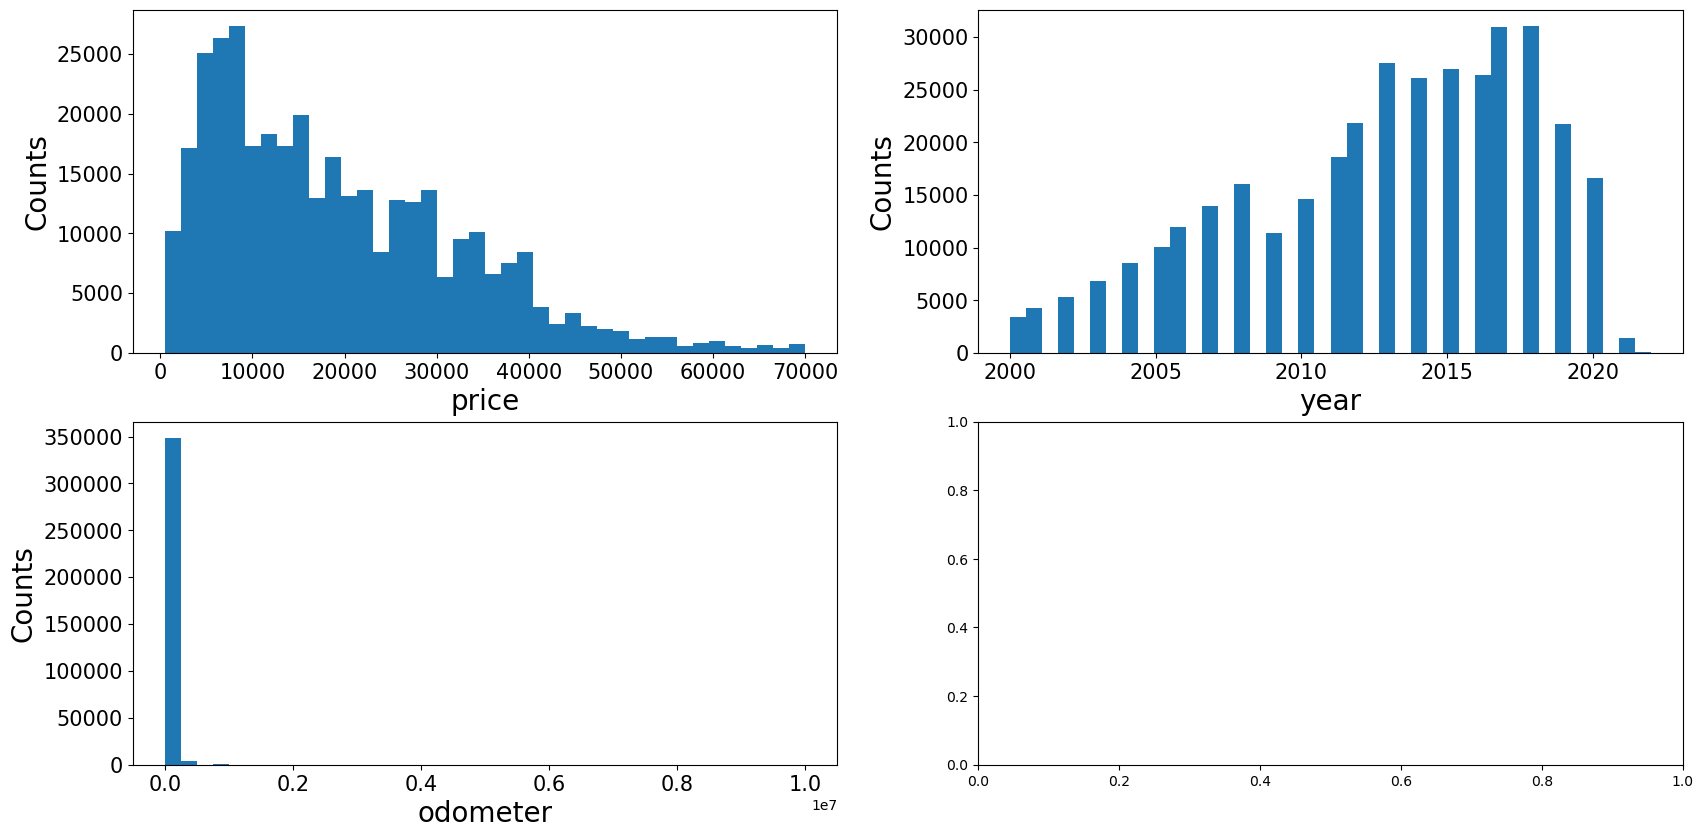

In [83]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['price', 'year', 'odometer']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_used_cars[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

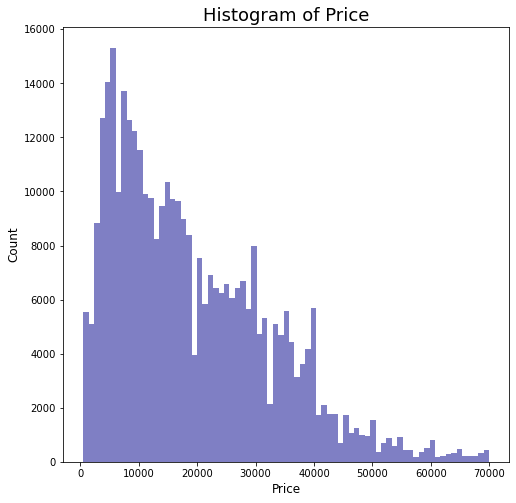

In [64]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.hist(df_used_cars['price'].dropna(), bins=75, facecolor='darkblue', alpha=0.5)
#Labels
plt.title('Histogram of Price', fontsize = 18)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.ticklabel_format(axis='x', style='plain') 
plt.show()

In [65]:
# check point copy before dropping elements
df_used_cars_copy4 = df_used_cars.copy(deep=True)

In [ ]:
# run if needed
# df_used_cars = df_used_cars_copy4.copy(deep=True)

In [88]:
df_used_cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'description', 'state', 'post_date'],
      dtype='object')

##### Feature engineering

In [89]:
# generate binary values for cylinders column
df_used_cars = pd.get_dummies(df_used_cars, columns=['cylinders'], prefix=['cyl_cnt'] )

In [99]:
df_used_cars = pd.get_dummies(df_used_cars, columns=['condition'], prefix=['condition'] )

In [100]:
df_used_cars.head()

id  region  price    year manufacturer                     model  \
0  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
1  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
2  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
3  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
4  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

  fuel  odometer title_status transmission drive  \
0  gas   57923.0        clean        other   NaN   
1  gas   71229.0        clean        other   NaN   
2  gas   19160.0        clean        other   NaN   
3  gas   41124.0        clean        other   NaN   
4  gas  128000.0        clean    automatic   rwd   

                                         description state   post_date  \
0  Carvana is the safer way to buy a car During t...    al  2021-05-04   
1  Carvana is the safer way to buy a car During t...    al  2021-05-04   
2  Carvana is the safer way to buy a car During t...    al  2021-05-04   
3  Carvana is the safer way to buy a car During t...    al  2021-05-04   
4  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al  2021-05-03   

   cyl_cnt_10 cylinders  cyl_cnt_12 cylinders  cyl_cnt_3 cylinders  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   cyl_cnt_4 cylinders  cyl_cnt_5 cylinders  cyl_cnt_6 cylinders  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    1   

   cyl_cnt_8 cylinders  condition_excellent  condition_fair  condition_good  \
0                    1                    0               0               1   
1                    1                    0               0               1   
2                    1                    0               0               1   
3                    1                    0               0               1   
4                    0                    1               0               0   

   condition_like new  condition_new  condition_salvage  
0                   0              0                  0  
1                   0              0                  0  
2                   0              0                  0  
3                   0              0                  0  
4                   0              0                  0

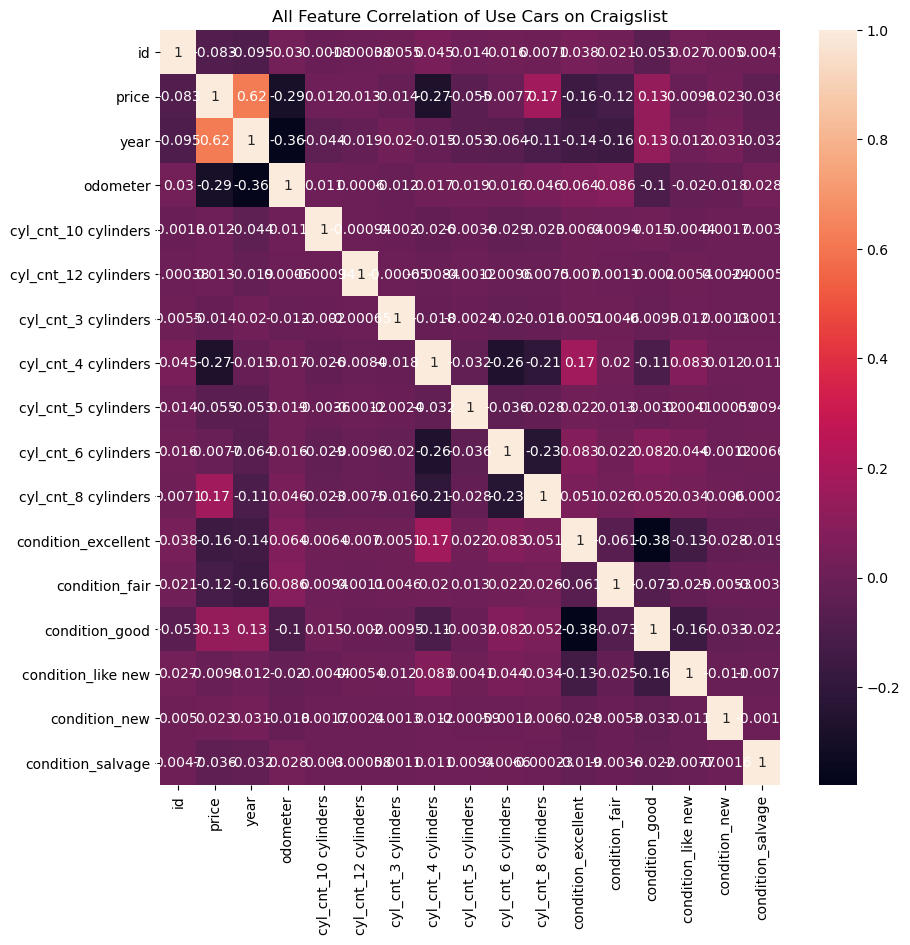

In [101]:
# correlation matrix
plt.figure(figsize = (10,10))
plt.title("All Feature Correlation of Use Cars on Craigslist")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(df_used_cars.corr(), annot=True)
plt.show()

In [102]:
# replace nan values
df_model_ready = df_used_cars.fillna(0)

In [ ]:
# use if needed
#df_used_cars.loc[df_used_cars['model'] == 'rochester']

In [103]:
df_used_cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'description',
       'state', 'post_date', 'cyl_cnt_10 cylinders', 'cyl_cnt_12 cylinders',
       'cyl_cnt_3 cylinders', 'cyl_cnt_4 cylinders', 'cyl_cnt_5 cylinders',
       'cyl_cnt_6 cylinders', 'cyl_cnt_8 cylinders', 'condition_excellent',
       'condition_fair', 'condition_good', 'condition_like new',
       'condition_new', 'condition_salvage'],
      dtype='object')

##### Model Ready

In [108]:
# split out X and y

X = df_model_ready[[ 'year', 'odometer', 'cyl_cnt_10 cylinders',
       'cyl_cnt_12 cylinders', 'cyl_cnt_3 cylinders', 'cyl_cnt_4 cylinders',
       'cyl_cnt_5 cylinders', 'cyl_cnt_6 cylinders', 'cyl_cnt_8 cylinders', 'condition_excellent',
       'condition_fair', 'condition_good', 'condition_like new',
       'condition_new', 'condition_salvage']]

y = df_model_ready['price']

In [109]:
# split the data in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Linear Regression

In [110]:
# train the model using linear regression
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff

Coefficient
year                   1630.520027
odometer                 -0.007704
cyl_cnt_10 cylinders  10481.063883
cyl_cnt_12 cylinders  18987.090562
cyl_cnt_3 cylinders   -9340.034843
cyl_cnt_4 cylinders   -6664.862012
cyl_cnt_5 cylinders   -3814.329355
cyl_cnt_6 cylinders    1324.593023
cyl_cnt_8 cylinders    8063.910505
condition_excellent   -2013.883597
condition_fair        -3348.176209
condition_good         -512.580279
condition_like new    -1394.145069
condition_new           348.619232
condition_salvage     -5932.344518

In [112]:
y_pred = lr.predict(X_test)

In [113]:
print(lr.score(X_test, y_test))

0.501222499073551


In [114]:
# calculate rmse and r2
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
train_MSE = mean_squared_error(y_test,y_pred)

In [115]:
# R² score
print("Test data - R-square ", r2_score(y_test,y_pred))
print("Test data - mean squared error ", train_MSE)
print("Test root mean square error (RMSE):", rmse)

Test data - R-square  0.501222499073551
Test data - mean squared error  90346883.48178868
Test root mean square error (RMSE): 9505.09776287381


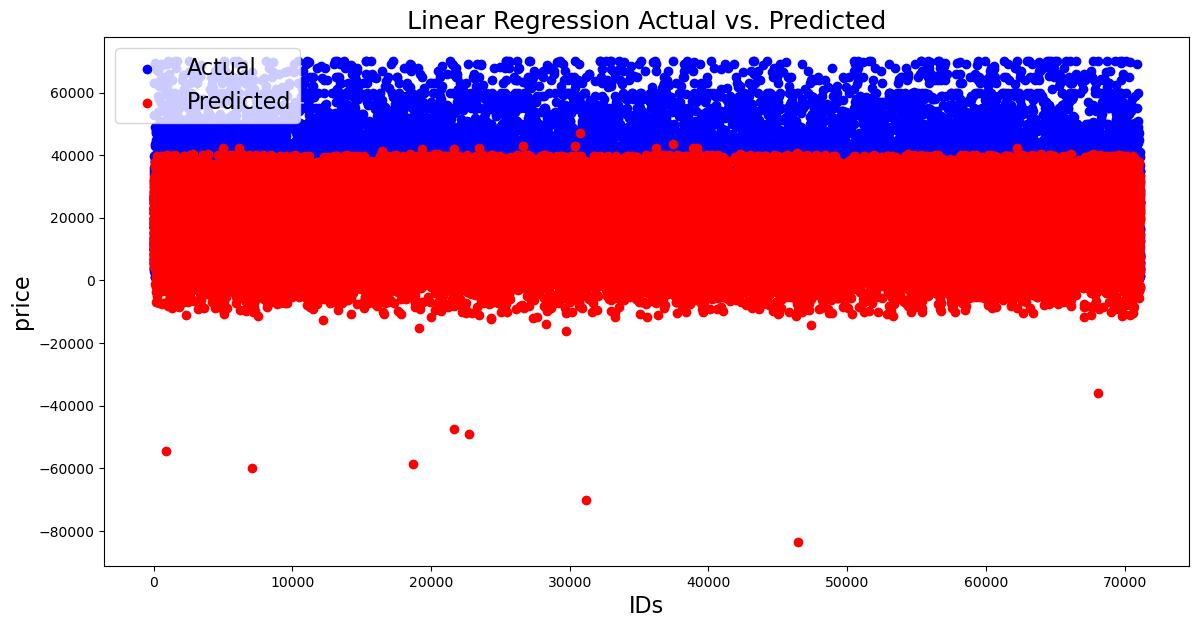

In [117]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Linear Regression Actual vs. Predicted', fontsize = 18)
plt.xlabel('IDs', fontsize = 16)
plt.ylabel('price', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



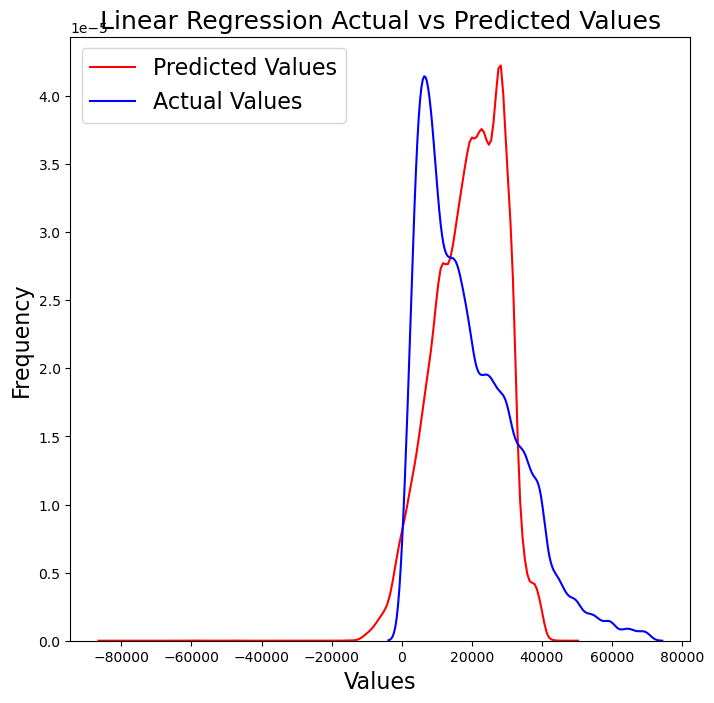

In [118]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Linear Regression Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')


plt.savefig('ap.png')

##### Decision Tree Model

In [119]:
# using decision tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [120]:
y_pred_dtr = dtr.predict(X_test)

In [125]:
rmse_dtr = np.sqrt(mean_squared_error(y_test,y_pred_dtr))
r2_dtr = r2_score(y_test,y_pred_dtr)
MSE_dtr = mean_squared_error(y_test,y_pred_dtr)

In [126]:
# R² score
print("Test data - R-square ", r2_dtr)
print("Test data - mean squared error ", MSE_dtr)
print("Test root mean square error (RMSE):", rmse_dtr)

Test data - R-square  0.7216507667171639
Test data - mean squared error  50419246.45746601
Test root mean square error (RMSE): 7100.651129119498


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



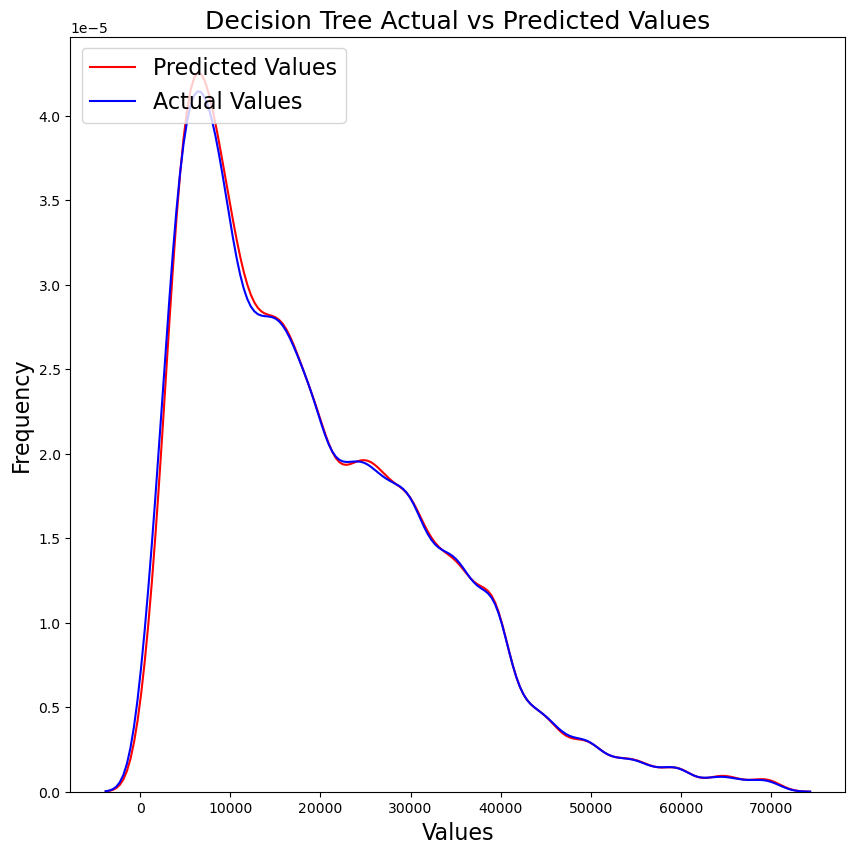

In [123]:
# Visualising the Decision Tree Regression Results 
plt.figure(figsize=(10,10))

sns.distplot(y_pred_dtr, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Decision Tree Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

In [124]:
df2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_dtr})
df2

Real Values  Predicted Values
402557        27998          27998.00
77191         14999          14999.00
308471         9998           9998.00
3555          31995          31995.00
8561          34990          34990.00
...             ...               ...
388658        24972          16488.00
383762         7999           6698.75
222376        22990          12490.00
53413         16590          16590.00
42146         24990          24990.00

[71111 rows x 2 columns]

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [128]:
#add the column of ones to the inputs to calculate the intercept 
X = sm.add_constant(X)

In [129]:
#create regression model based on ordinary least squares
ols = sm.OLS(y, X)

In [130]:
#variable results
results = ols.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:30:46   Log-Likelihood:            -3.7628e+06
No. Observations:              355551   AIC:                         7.526e+06
Df Residuals:                  355535   BIC:                         7.526e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.258e+06 

In [132]:
ypred =  results.predict(X)
print('predicted response:',ypred, sep='\n')

predicted response:
0         29449.648443
1         22831.632248
2         39521.103249
3         34465.540077
4         19081.889554
              ...     
426807    31055.175131
426808    31521.690485
426809    31582.023483
426810    29442.458692
426811    29810.651614
Length: 355551, dtype: float64


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



(0.0, 81068.1392592659)

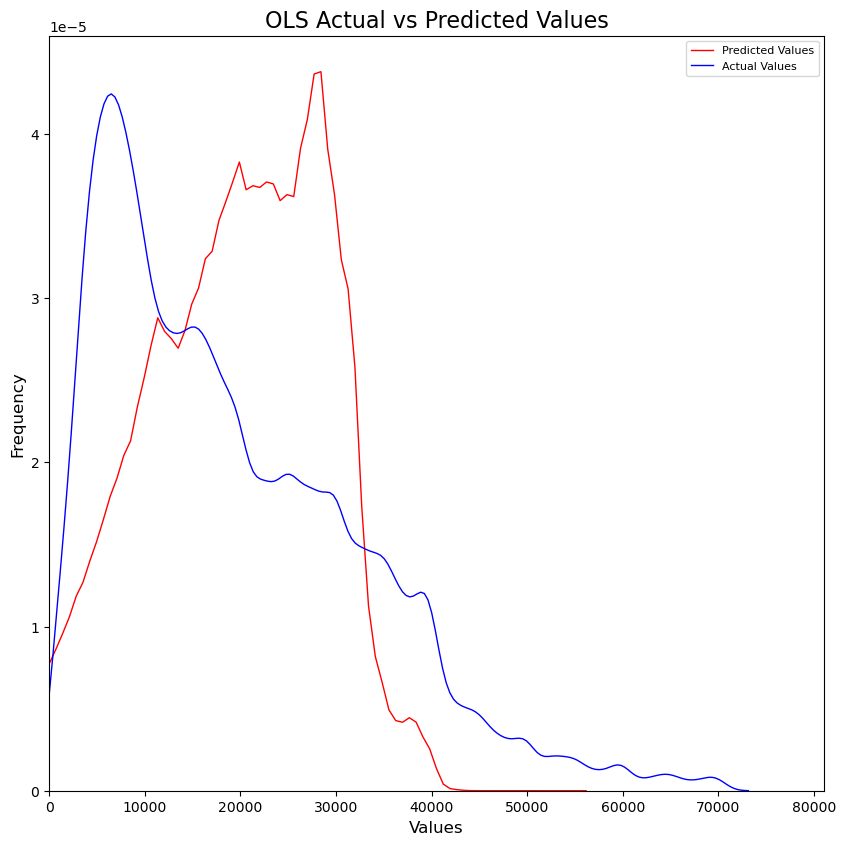

In [133]:
plt.figure(figsize=(10,10))
sns.distplot(ypred, hist = False, color = 'r', label = 'Predicted Values',  kde_kws=dict(linewidth=1))
sns.distplot(y, hist = False, color = 'b', label = 'Actual Values',  kde_kws=dict(linewidth=1))
plt.title('OLS Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0)